In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


### CIFAR 10 dataset imported



In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

## 10 classes are imported

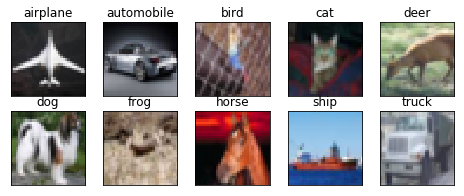

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### 

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from keras.layers import GlobalAveragePooling2D,SeparableConv2D,DepthwiseConv2D,Conv2DTranspose

In [0]:
def grouped_convolution(y, nb_channels, _strides):
        # when `cardinality` == 1 this is just a standard convolution
        if cardinality == 1:
            return layers.Conv2D(nb_channels, kernel_size=(3, 3), strides=_strides, padding='same')(y)
        
        assert not nb_channels % cardinality
        _d = nb_channels // cardinality

        # in a grouped convolution layer, input and output channels are divided into `cardinality` groups,
        # and convolutions are separately performed within each group
        groups = []
        for j in range(cardinality):
            group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
            groups.append(layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides, padding='same')(group))
            
        # the grouped convolutional layer concatenates them as the outputs of the layer
        y = layers.concatenate(groups)

        return y

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten,BatchNormalization
from keras.layers.convolutional import Conv2D,DepthwiseConv2D
from keras.layers.pooling import MaxPooling2D

from keras import layers

In [0]:
cardinality = 1

In [0]:
def grouped_convolution_1(y, nb_channels, _strides):
        
        assert not nb_channels % cardinality
        _d = nb_channels // cardinality

        # in a grouped convolution layer, input and output channels are divided into `cardinality` groups,
        # and convolutions are separately performed within each group
        groups = []
        for j in range(cardinality):
            group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
            groups.append((layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides, padding='same'))(group))
            groups.append(layers.Conv2D(_d, kernel_size=(5, 5), strides=_strides, padding='same')(group))
        
        
#         for j in range(cardinality):
#             group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
#             groups.append(layers.Conv2D(_d, kernel_size=(5, 5), strides=_strides, padding='same')(group))
            
        # the grouped convolutional layer concatenates them as the outputs of the layer
        y = layers.concatenate(groups)

        return y

In [0]:
def grouped_convolution_2(y, nb_channels, _strides):
        
        
        assert not nb_channels % cardinality
        _d = nb_channels // cardinality

        # in a grouped convolution layer, input and output channels are divided into `cardinality` groups,
        # and convolutions are separately performed within each group
        groups = []
        for j in range(cardinality):
            group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
            groups.append(layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides,dilation_rate=(1, 1), padding='same')(group))
            groups.append(layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides,dilation_rate=(2, 2), padding='same')(group))
        

            
            
        # the grouped convolutional layer concatenates them as the outputs of the layer
        y = layers.concatenate(groups)

        return y

In [14]:
_input_ = Input(shape=(32,32,3))
x1 = Conv2D(32, (3, 3), activation='relu', padding = 'same')(_input_)
x1 = BatchNormalization()(x1)

# Grouped convolution 1
x2 = grouped_convolution_1(x1, 32 ,_strides=(1, 1))

# spatially seperated convolution
x3 = Conv2D(32, (3, 1), activation='relu', padding = 'same')(x2)
x3 = BatchNormalization()(x3)

x4 = Conv2D(32, (1, 3), activation='relu', padding = 'same')(x3)
x4 = BatchNormalization()(x4)


# depth wise seperatable
x5 = SeparableConv2D(32, (3, 3), activation='relu', padding = 'same')(x4)
x5 = BatchNormalization()(x5)


# Grouped convolution 2
x6 = grouped_convolution_2(x5, 32, _strides=(1, 1))

pool21 = MaxPooling2D(pool_size=(2, 2))(x6)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)

#pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)


conv23 = Conv2D(10, (1, 1))(conv22)
gpool = GlobalAveragePooling2D()(conv23)
output = Activation(activation='softmax')(gpool)


model = Model(inputs=[_input_], outputs=output)




print(model.summary())
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 32, 32, 32)   896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 32, 32, 32)   128         conv2d_10[0][0]                  
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 32, 32, 32)   0           batch_normalization_5[0][0]      
__________________________________________________________________________________________________
conv2d_11 

## Cyclic Learning rate

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  
W0621 01:04:46.915560 140278214190976 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructi

Epoch 1/50
390/390 [==============================] - 20s 50ms/step - loss: 1.5368 - acc: 0.4332 - val_loss: 1.3310 - val_acc: 0.5307
Epoch 2/50
390/390 [==============================] - 17s 43ms/step - loss: 1.1520 - acc: 0.5876 - val_loss: 1.3423 - val_acc: 0.5259
Epoch 3/50
390/390 [==============================] - 17s 43ms/step - loss: 1.0205 - acc: 0.6375 - val_loss: 1.0249 - val_acc: 0.6318
Epoch 4/50
390/390 [==============================] - 17s 43ms/step - loss: 0.9428 - acc: 0.6644 - val_loss: 0.9610 - val_acc: 0.6548
Epoch 5/50
390/390 [==============================] - 17s 44ms/step - loss: 0.8862 - acc: 0.6845 - val_loss: 0.9875 - val_acc: 0.6427
Epoch 6/50
390/390 [==============================] - 17s 43ms/step - loss: 0.8405 - acc: 0.7019 - val_loss: 1.0099 - val_acc: 0.6446
Epoch 7/50
390/390 [==============================] - 17s 43ms/step - loss: 0.8076 - acc: 0.7107 - val_loss: 0.8799 - val_acc: 0.6901
Epoch 8/50
390/390 [==============================] - 17s 43ms

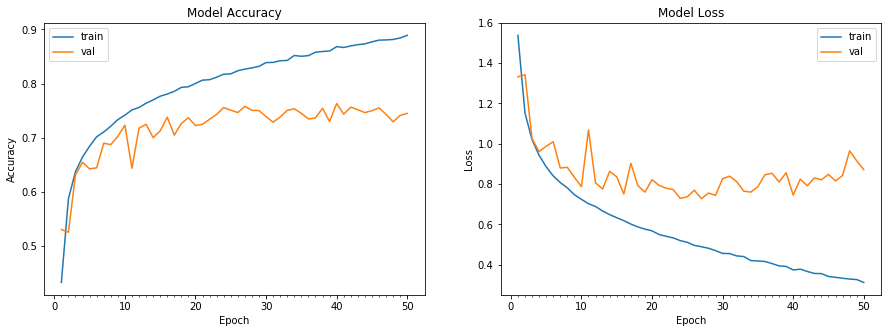

Accuracy on test data is: 74.50


In [15]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model

# Features are fed to the generator 
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))